In [1]:
#import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
data = 'F:/BE/DL/brain_tumor/brain_tumor_dataset'
No_brain_tumor = 'F:/BE/DL/brain_tumor/no'
Yes_brain_tumor = 'F:/BE/DL/brain_tumor/yes'

In [12]:
import os

dir_list = [No_brain_tumor, Yes_brain_tumor]
classes = ['no', 'yes']
filepaths = []
labels = []

for i,j in zip(dir_list, classes):
    filelist = os.listdir(i)
    for name in filelist:
        filepath = os.path.join(i, name)
        filepaths.append(filepath)
        labels.append(j)
        
print('filepaths:', len(filepaths), 'labels:', len(labels))


FileNotFoundError: ignored

In [ ]:
file_content=pd.Series(filepaths, name='filepaths')
label_content=pd.Series(labels, name='labels')
df=pd.concat([file_content,label_content], axis=1)
df=pd.DataFrame(np.array(df).reshape(253,2), columns = ['filepaths', 'labels'])
df.head()

,filepaths,labels
0,/content/drive/MyDrive/brain_tumor/brain_tumor...,no
1,/content/drive/MyDrive/brain_tumor/brain_tumor...,no
2,/content/drive/MyDrive/brain_tumor/brain_tumor...,no
3,/content/drive/MyDrive/brain_tumor/brain_tumor...,no
4,/content/drive/MyDrive/brain_tumor/brain_tumor...,no


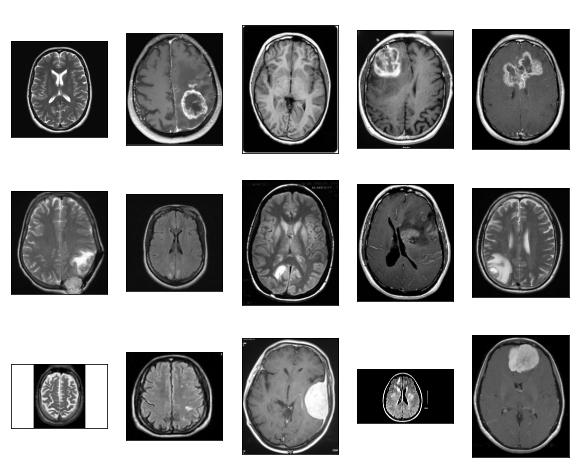

In [ ]:
#visualize brain tumor images
import cv2

plt.figure(figsize=(10,8))
for i in range(15):
    random = np.random.randint(1,len(df))
    plt.subplot(3,5,i+1)
    plt.imshow(cv2.imread(df.loc[random,"filepaths"]))
    plt.title(df.loc[random, "labels"], size = 15, color = "white") 
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df, test_size=0.2, random_state=42)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42)

print(f"train set shape: {x_train.shape}")
print(f"test set shape: {x_test.shape}")
print(f"validation set shape: {x_val.shape}")

train set shape: (161, 2)
test set shape: (51, 2)
validation set shape: (41, 2)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode ='nearest')

validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(dataframe = x_train,
                                                   x_col = 'filepaths',
                                                   y_col = 'labels',
                                                   target_size=(150,150),
                                                   class_mode='binary',
                                                   batch_size=16)

validation_generator = validation_datagen.flow_from_dataframe(dataframe = x_val,
                                                             x_col = 'filepaths',
                                                             y_col = 'labels',
                                                             target_size = (150,150),
                                                             class_mode='binary',
                                                             batch_size=8)

test_generator = test_datagen.flow_from_dataframe(dataframe = x_test,
                                                  x_col = 'filepaths',
                                                  y_col = 'labels',
                                                  target_size = (150,150),
                                                  class_mode='binary',
                                                  batch_size=8)

Found 161 validated image filenames belonging to 2 classes.
Found 41 validated image filenames belonging to 2 classes.
Found 51 validated image filenames belonging to 2 classes.


In [ ]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', 
                                                     input_shape = (150,150,3),
                                                     include_top=False)


model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 3, 3, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten_2 (Flatten)         (None, 13824)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              14156800  
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 68,494,561
Trainable params: 68,434,017
Non-trainable params: 60,544
_____________________________________

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate = 0.0001), metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,epochs=30,steps_per_epoch=10,validation_data = validation_generator,validation_steps=6,verbose=1)

Epoch 1/30
10/10 [==============================] - 107s 8s/step - loss: 0.9091 - accuracy: 0.5655 - val_loss: 1.0377 - val_accuracy: 0.4390
Epoch 2/30
10/10 [==============================] - 73s 7s/step - loss: 0.6338 - accuracy: 0.7241 - val_loss: 1.8974 - val_accuracy: 0.3415
Epoch 3/30
10/10 [==============================] - 75s 7s/step - loss: 0.5931 - accuracy: 0.7862 - val_loss: 0.5078 - val_accuracy: 0.7317
Epoch 4/30
10/10 [==============================] - 83s 8s/step - loss: 0.4353 - accuracy: 0.8188 - val_loss: 0.4077 - val_accuracy: 0.8293
Epoch 5/30
10/10 [==============================] - 76s 8s/step - loss: 0.2803 - accuracy: 0.8621 - val_loss: 0.5088 - val_accuracy: 0.8049
Epoch 6/30
10/10 [==============================] - 73s 7s/step - loss: 0.2804 - accuracy: 0.9034 - val_loss: 0.3513 - val_accuracy: 0.8049
Epoch 7/30
10/10 [==============================] - 74s 7s/step - loss: 0.2661 - accuracy: 0.8897 - val_loss: 0.5941 - val_accuracy: 0.7561
Epoch 8/30
10/10 [=

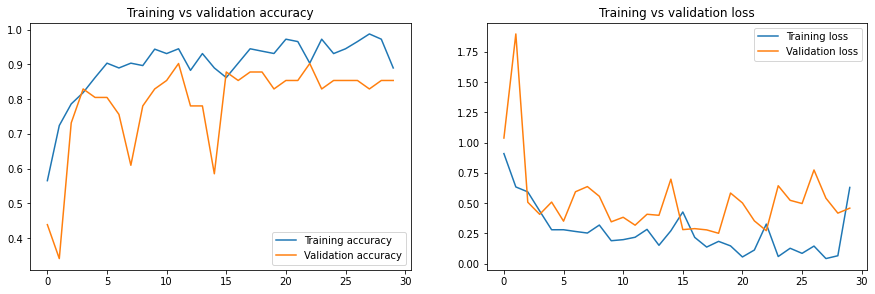

In [ ]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [ ]:
test_accuracy = model.evaluate(test_generator)[1]

7/7 [==============================] - 10s 1s/step - loss: 0.3311 - accuracy: 0.9020


In [ ]:
print(test_accuracy)

0.9019607901573181


In [ ]:
pred = model.predict(test_generator)
pred = np.argmax(pred, axis=1)
labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
y_pred = [labels[k] for k in pred]

7/7 [==============================] - 10s 743ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("\n The Classification report is \n")
print(classification_report(x_test.labels, y_pred))
print("\n The Confusion Matrix is \n")
print(confusion_matrix(x_test.labels, y_pred))


 The Classification report is 

              precision    recall  f1-score   support

          no       0.39      1.00      0.56        20
         yes       0.00      0.00      0.00        31

    accuracy                           0.39        51
   macro avg       0.20      0.50      0.28        51
weighted avg       0.15      0.39      0.22        51


 The Confusion Matrix is 

[[20  0]
 [31  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
